# The problem setup
- A friend tells you they have some data, and ask if you "can do machine learning on it"
- After discussion, you realize they have a classification task (Predicting label given features)
- You say to yourself "aha, I can use a supervised learning classifier to predict the labels from the features", and tell your friend "yes I can use machine learning for this"
- How do you proceed?

## \*Set important constants\*

In [35]:
RESULTS_LOC = None  # path to store results, if none current directory is used
SCORING = "balanced_accuracy"
TEST_SIZE = 0.3     # proportion of data to withhold for testing
CV = 5              # number of folds for GridSearchCV
REPS_PER_CLF = 1    # number of trials of GSCV with each CLF
DIM_RED = None      # options- None, "PCA", "SPCA", "FA"
N_COMPS =  None     # None or int < n_feats   (5, 22 are interesting)

# DATA_LOC = "data_pain.csv"
# TARGET_COL = "Group"
# REMOVE_COLS = ["Group", "Study ID"]

## \*Set up data\* 

In [36]:
# def load_data(loc=DATA_LOC):
#     df = read_csv(loc)
#     y = df[TARGET_COL]
#     print("Removing columns ", REMOVE_COLS)
#     df = df.drop(REMOVE_COLS, axis=1)
#     return df, y

# returns dataFrame containing features, and vector of targets 
def load_data(n=0):
    if n==0:
        from sklearn.datasets import load_digits
        digits = load_digits()
        return digits.data, digits.target
    else:
        print("Invalid dataset! {}".format(n))

        
X, y = load_data() # get data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, stratify=y) 

# scale
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Imports

In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from pandas import read_csv
from sklearn.decomposition import PCA, SparsePCA, FactorAnalysis

In [38]:
# should import from elsewhere
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import time
def get_time(): # used to create time stamp for figures
    t = time.localtime()
    return "{}_{}_{}_{}_{}".format(t.tm_mon, t.tm_mday, t.tm_hour, t.tm_min, t.tm_sec)

## Dimensionality reduction

In [39]:
if DIM_RED is not None:
    dr = None
    if DIM_RED == "PCA":
        dr = PCA(N_COMPS)
    elif DIM_RED == "SPCA":
        dr = SPCA(N_COMPS)
    elif DIM_RED == "FA":
        dr = FactorAnalysis(N_COMPS)
    else:
        raise("Invalid DIM_RED {}".format(DIM_RED))
        
    dr.fit(X_train)
    X_train = dr.transform(X_train)
    X_test = dr.transform(X_test)


## Set up classifiers and params 
### (see get_clfs_and_params for help)

In [40]:
clfs = [
    (RandomForestClassifier ,
 {
	'bootstrap': [True],
	'class_weight': [None],
	'criterion': ['entropy'],
	'max_depth': [None],
	'max_features': ['auto'],
	'max_leaf_nodes': [None],
	'min_impurity_decrease': [0.0],
	'min_impurity_split': [None],
	'min_samples_leaf': [1, 2, 4, 8],
	'min_samples_split': [2, 4, 8],
	'min_weight_fraction_leaf': [0.0],
	'n_estimators': [50, 100, 250],
	'n_jobs': [None],
	'oob_score': [False],
	'random_state': [None],
	'verbose': [0],
	'warm_start': [False],


}),
(AdaBoostClassifier ,
 {
	'algorithm': ['SAMME.R'],
	'base_estimator': [None],
	'learning_rate': [0.5, 1.0, 1.5, 2.5],
	'n_estimators': [50, 100, 250],
	'random_state': [None],


}),
(GradientBoostingClassifier ,
 {
	'criterion': ['friedman_mse'],
	'init': [None],
	'learning_rate': [0.05, 0.1, 0.15, 0.25],
	'loss': ['deviance'],
	'max_depth': [3],
	'max_features': [None],
	'max_leaf_nodes': [None],
	'min_impurity_decrease': [0.0],
	'min_impurity_split': [None],
	'min_samples_leaf': [1, 2, 4, 8],
	'min_samples_split': [2, 4, 8],
	'min_weight_fraction_leaf': [0.0],
	'n_estimators': [50, 100, 250],
	'n_iter_no_change': [None],
	'presort': ['auto'],
	'random_state': [None],
	'subsample': [1.0],
	'tol': [0.0001],
	'validation_fraction': [0.1],
	'verbose': [0],
	'warm_start': [False],


}),
(RidgeClassifier ,
 {
	'alpha': [0.5, 1.0, 1.5, 2.5],
	'class_weight': [None],
	'copy_X': [True],
	'fit_intercept': [True],
	'max_iter': [None],
	'normalize': [False],
	'random_state': [None],
	'solver': ['auto'],
	'tol': [0.001],


}),
(LogisticRegression ,
 {
	'C': [0.5, 1.0, 1.5, 2.5],
	'class_weight': [None],
	'dual': [False],
	'fit_intercept': [True],
	'intercept_scaling': [1],
	'l1_ratio': [None],
	'max_iter': [100],
	'multi_class': ['warn'],
	'n_jobs': [None],
	'penalty': ['l2'],
	'random_state': [None],
	'solver': ['warn'],
	'tol': [0.0001],
	'verbose': [0],
	'warm_start': [False],


}),
(LinearDiscriminantAnalysis ,
 {
	'n_components': [None],
	'priors': [None],
	'shrinkage': [None],
	'solver': ['svd'],
	'store_covariance': [True],
	'tol': [0.0001],


}),
(QuadraticDiscriminantAnalysis ,
 {
	'priors': [None],
	'reg_param': [0.0],
	'store_covariance': [True],
	'tol': [0.0001],


}),
(KNeighborsClassifier ,
 {
	'algorithm': ['auto'],
	'leaf_size': [30],
	'metric': ['minkowski'],
	'metric_params': [None],
	'n_jobs': [None],
	'n_neighbors': [3, 5, 7, 9],
	'p': [1.5, 2, 3, 4, 5, 6],
	'weights': ['uniform'],


}),
(SVC ,
 {
	'C': [1.0],
	'cache_size': [200],
	'class_weight': [None],
	'coef0': [0.0],
	'decision_function_shape': ['ovr'],
	'degree': [3],
	'gamma': ['auto', "scale"],
	'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
	'max_iter': [-1],
	'probability': [False],
	'random_state': [None],
	'shrinking': [True],
	'tol': [0.001],
	'verbose': [False],

}),
]

# Do learning (ie fit the classifiers)

In [41]:
from sklearn.model_selection import GridSearchCV
TIME = get_time()

def fit_clf(clf):
    print(clf)
    if REPS_PER_CLF > 1:
        return [GridSearchCV(clf[0](), clf[1], cv=CV, scoring=SCORING).fit(X_train, y_train) for _ in range(REPS)] # fit multiple times 
    else:
        return GridSearchCV(clf[0](), clf[1], cv=CV, scoring=SCORING).fit(X_train, y_train)
    
clfs = list(map(
    fit_clf , clfs 
))

if type(clfs[0]) is list:
    clfs = [item for sublist in clfs for item in sublist] # flatten


(<class 'sklearn.ensemble.forest.RandomForestClassifier'>, {'bootstrap': [True], 'class_weight': [None], 'criterion': ['entropy'], 'max_depth': [None], 'max_features': ['auto'], 'max_leaf_nodes': [None], 'min_impurity_decrease': [0.0], 'min_impurity_split': [None], 'min_samples_leaf': [1, 2, 4, 8], 'min_samples_split': [2, 4, 8], 'min_weight_fraction_leaf': [0.0], 'n_estimators': [50, 100, 250], 'n_jobs': [None], 'oob_score': [False], 'random_state': [None], 'verbose': [0], 'warm_start': [False]})
(<class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, {'algorithm': ['SAMME.R'], 'base_estimator': [None], 'learning_rate': [0.5, 1.0, 1.5, 2.5], 'n_estimators': [50, 100, 250], 'random_state': [None]})


c:\users\bigtuna\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


(<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, {'criterion': ['friedman_mse'], 'init': [None], 'learning_rate': [0.05, 0.1, 0.15, 0.25], 'loss': ['deviance'], 'max_depth': [3], 'max_features': [None], 'max_leaf_nodes': [None], 'min_impurity_decrease': [0.0], 'min_impurity_split': [None], 'min_samples_leaf': [1, 2, 4, 8], 'min_samples_split': [2, 4, 8], 'min_weight_fraction_leaf': [0.0], 'n_estimators': [50, 100, 250], 'n_iter_no_change': [None], 'presort': ['auto'], 'random_state': [None], 'subsample': [1.0], 'tol': [0.0001], 'validation_fraction': [0.1], 'verbose': [0], 'warm_start': [False]})
(<class 'sklearn.linear_model.ridge.RidgeClassifier'>, {'alpha': [0.5, 1.0, 1.5, 2.5], 'class_weight': [None], 'copy_X': [True], 'fit_intercept': [True], 'max_iter': [None], 'normalize': [False], 'random_state': [None], 'solver': ['auto'], 'tol': [0.001]})
(<class 'sklearn.linear_model.logistic.LogisticRegression'>, {'C': [0.5, 1.0, 1.5, 2.5], 'class_weight': [None], '

c:\users\bigtuna\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\bigtuna\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\bigtuna\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\bigtuna\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "t

c:\users\bigtuna\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\bigtuna\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\bigtuna\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\bigtuna\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "t

(<class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>, {'n_components': [None], 'priors': [None], 'shrinkage': [None], 'solver': ['svd'], 'store_covariance': [True], 'tol': [0.0001]})
(<class 'sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis'>, {'priors': [None], 'reg_param': [0.0], 'store_covariance': [True], 'tol': [0.0001]})


c:\users\bigtuna\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\bigtuna\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\bigtuna\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\bigtuna\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\bigtuna\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\bigtun

(<class 'sklearn.neighbors.classification.KNeighborsClassifier'>, {'algorithm': ['auto'], 'leaf_size': [30], 'metric': ['minkowski'], 'metric_params': [None], 'n_jobs': [None], 'n_neighbors': [3, 5, 7, 9], 'p': [1.5, 2, 3, 4, 5, 6], 'weights': ['uniform']})
(<class 'sklearn.svm.classes.SVC'>, {'C': [1.0], 'cache_size': [200], 'class_weight': [None], 'coef0': [0.0], 'decision_function_shape': ['ovr'], 'degree': [3], 'gamma': ['auto', 'scale'], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'max_iter': [-1], 'probability': [False], 'random_state': [None], 'shrinking': [True], 'tol': [0.001], 'verbose': [False]})


### Display results

In [42]:
if not RESULTS_LOC: RESULTS_LOC = "."
cv_fit_results = list(map(
    lambda clf: clf.cv_results_["mean_test_score"], clfs
))

In [43]:
def clf_name_from_gs(gs):
    return str(gs.estimator).split("(")[0]
    
names = list(map(
    clf_name_from_gs, clfs
))

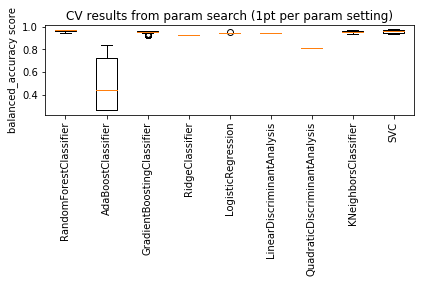

In [51]:
from matplotlib import pyplot as plt
n_results = len(cv_fit_results)
plt.boxplot(cv_fit_results)
plt.xticks(range(1, n_results+1), names, rotation=90)
plt.title("CV results from param search (1pt per param setting)")
plt.ylabel("{} score".format(SCORING))
plt.tight_layout()
plt.savefig("{}/cv_results_{}_{}-{}_{}.png".format(RESULTS_LOC ,SCORING, DIM_RED, N_COMPS, TIME))
plt.show()

In [45]:
from sklearn.metrics import get_scorer

scorer = get_scorer(SCORING)
score_results = list(map(
    lambda clf: scorer(y_true=y_test, estimator=clf, X=X_test), clfs
))

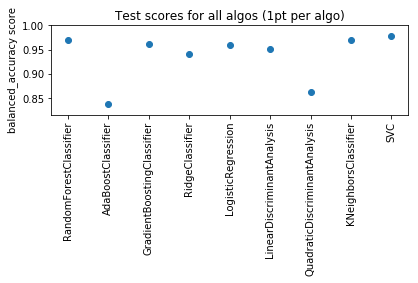

In [54]:
# plt.scatter(range(len(score_results)),score_results)
plt.scatter(names,score_results)
plt.xticks(rotation=90)
n_results = len(score_results)
# plt.plot(range(n_results), [0.5]*n_results)
plt.title("Test scores for all algos (1pt per algo)")
plt.ylabel("{} score".format(SCORING))
# plt.ylabel(SCORING)
plt.tight_layout()
plt.savefig("{}/scores_max{:.3f}_{}_{}-{}_{}.png".format(RESULTS_LOC, max(score_results), SCORING, DIM_RED, N_COMPS, TIME)) 
plt.show()

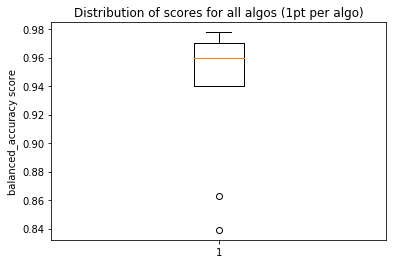

In [55]:
plt.boxplot(score_results)
plt.title("Distribution of scores for all algos (1pt per algo)")
plt.ylabel("{} score".format(SCORING))
plt.show()

In [57]:
with open("{}/best_clfs_{}.txt".format(RESULTS_LOC ,TIME), "w") as f:
    for clf in clfs:
        f.write(str(clf.best_estimator_) + "\n\n")
#         f.write("\n")